I wil start with uploading and exploring the data

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import shapiro, kstest, normaltest
from scipy.stats import probplot
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE


In [7]:
# Load the datasets
directory1 = "/content/TMall (1).parquet"
directory2 = "/content/TMall_LogData (1).parquet"

In [8]:
df1 = pd.read_parquet(directory1)
df2 = pd.read_parquet(directory2)

# Display the first 5 rows of df1
print(df1.head())

# Display the first 5 rows of df2
print(df2.head())

                                 SSID user_session  session  visitorid  \
1092725   201308271734260100000055339    1000000_0        0    1000000   
1942407  2013052416242601000001320115    1000001_0        0    1000001   
1073483  2013082622502601000002376356    1000002_0        0    1000002   
837287   2013081308262601000003422529    1000003_0        0    1000003   
324990   2013061702082601000007300114    1000007_0        0    1000007   

                      timestamp  itemid  event  event_duration  \
1092725 2013-08-27 17:34:00.626   55339      2      260.718177   
1942407 2013-05-24 16:24:31.738  320115      2      260.718177   
1073483 2013-08-26 22:50:57.216  376356      2      260.718177   
837287  2013-08-13 08:26:28.112  422529      2      260.718177   
324990  2013-06-17 02:08:42.130  300114      2      260.718177   

         events_per_session    PageTime  ...  time_since_last_view  \
1092725                   1  260.718177  ...                   0.0   
1942407           


Checking normality for feature: events_per_session


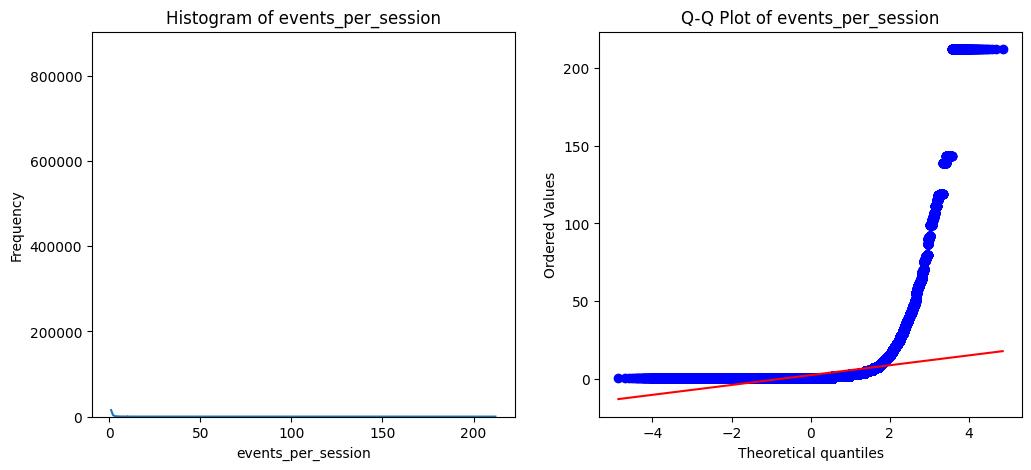

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W=0.2017, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.4141, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=2115005.6096, p-value=0.0000

Interpretation:
The feature 'events_per_session' does not follow a normal distribution (p < 0.05 in at least one test).

Checking normality for feature: time_since_last_view


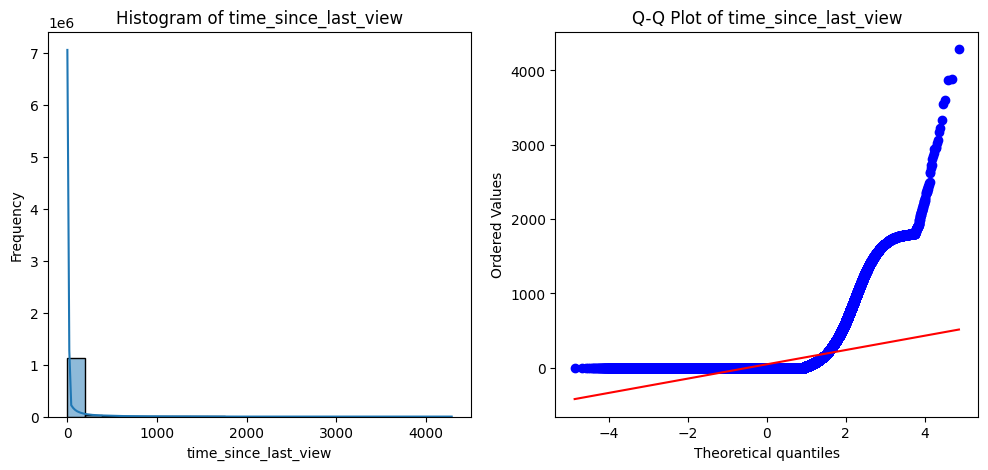

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W=0.2823, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.4254, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=1307150.4400, p-value=0.0000

Interpretation:
The feature 'time_since_last_view' does not follow a normal distribution (p < 0.05 in at least one test).

Checking normality for feature: time_since_last_ATC


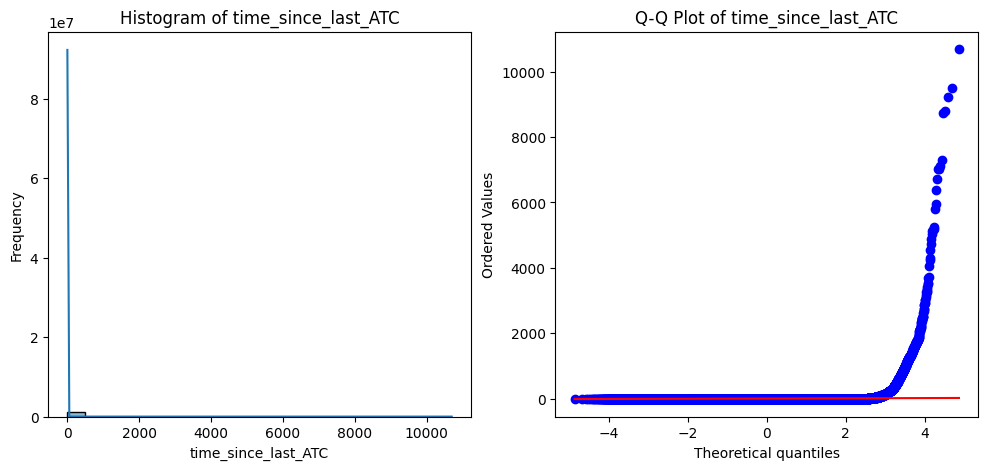

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W=0.0074, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.5046, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=4956009.5774, p-value=0.0000

Interpretation:
The feature 'time_since_last_ATC' does not follow a normal distribution (p < 0.05 in at least one test).

Checking normality for feature: time_since_last_purchase


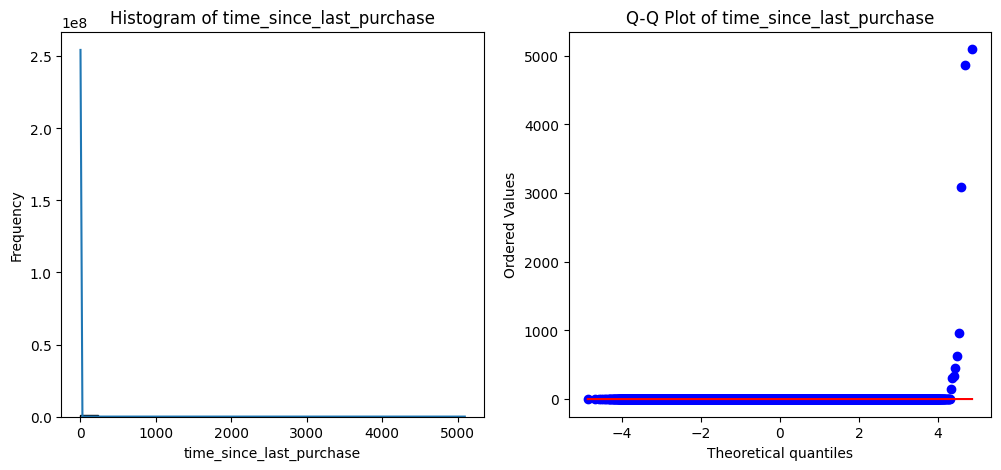

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W=0.0001, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.5006, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=7967140.2473, p-value=0.0000

Interpretation:
The feature 'time_since_last_purchase' does not follow a normal distribution (p < 0.05 in at least one test).

Checking normality for feature: TimeOfDay


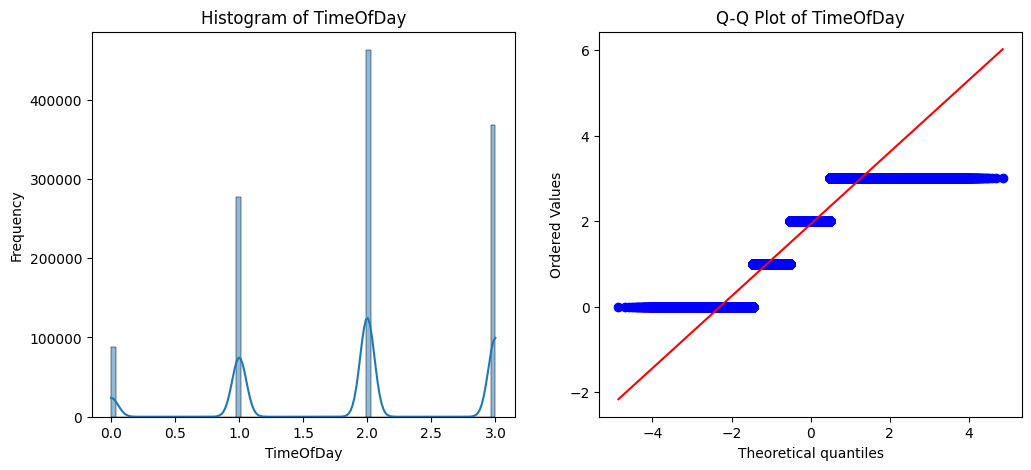

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test: W=0.8546, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.2258, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=92438.9812, p-value=0.0000

Interpretation:
The feature 'TimeOfDay' does not follow a normal distribution (p < 0.05 in at least one test).

Checking normality for feature: WeekdayVsWeekend


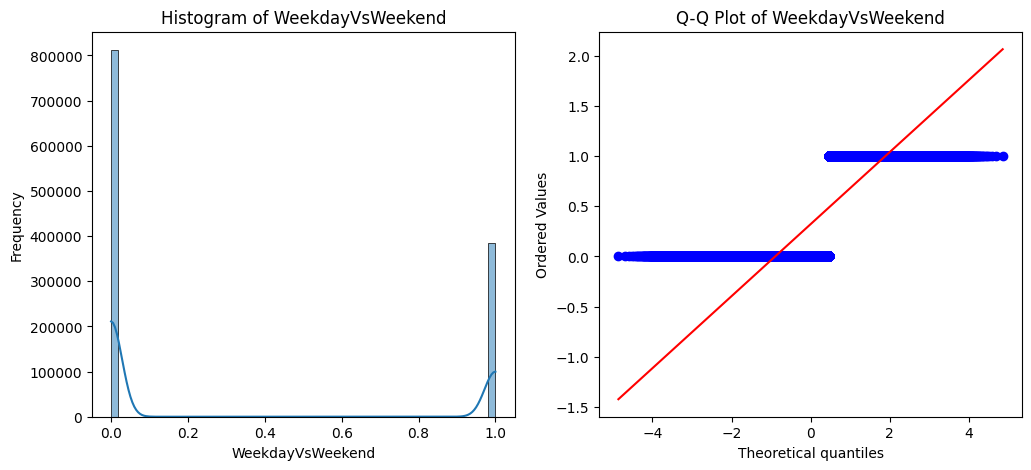

Shapiro-Wilk Test: W=0.5884, p-value=0.0000
Kolmogorov-Smirnov Test: D=0.4330, p-value=0.0000
D’Agostino and Pearson’s Test: Statistic=10151399.1163, p-value=0.0000

Interpretation:
The feature 'WeekdayVsWeekend' does not follow a normal distribution (p < 0.05 in at least one test).


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1196087.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, kstest, normaltest, probplot

# Load your data from the Parquet file into the DataFrame
data = pd.read_parquet("/content/TMall (1).parquet")  # Replace with the path to your actual dataset file

# Function to check normality for a given feature
def check_normality(data, feature):
    print(f"\nChecking normality for feature: {feature}")

    # Plot Histogram and Q-Q Plot
    plt.figure(figsize=(12, 5))

    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    probplot(data[feature].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {feature}")
    plt.show()

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data[feature].dropna())
    print(f"Shapiro-Wilk Test: W={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(data[feature].dropna(), 'norm', args=(data[feature].mean(), data[feature].std()))
    print(f"Kolmogorov-Smirnov Test: D={ks_stat:.4f}, p-value={ks_p:.4f}")

    # D’Agostino and Pearson’s Test
    dagostino_stat, dagostino_p = normaltest(data[feature].dropna())
    print(f"D’Agostino and Pearson’s Test: Statistic={dagostino_stat:.4f}, p-value={dagostino_p:.4f}")

    # Interpretation
    print("\nInterpretation:")
    if shapiro_p < 0.05 or ks_p < 0.05 or dagostino_p < 0.05:
        print(f"The feature '{feature}' does not follow a normal distribution (p < 0.05 in at least one test).")
    else:
        print(f"The feature '{feature}' appears to be normally distributed.")

# List of features directly specified for normality check
research_features = [
    'events_per_session',      # Number of events in each session
    'time_since_last_view',     # Time since the last view event
    'time_since_last_ATC',      # Time since last add-to-cart event
    'time_since_last_purchase', # Time since last purchase
    'TimeOfDay',                # Hour or part of the day
    'WeekdayVsWeekend'
    ]  # Distinguishes weekday from weekend
# Apply the normality check function to each feature in the list
for feature in research_features:
    check_normality(data, feature)

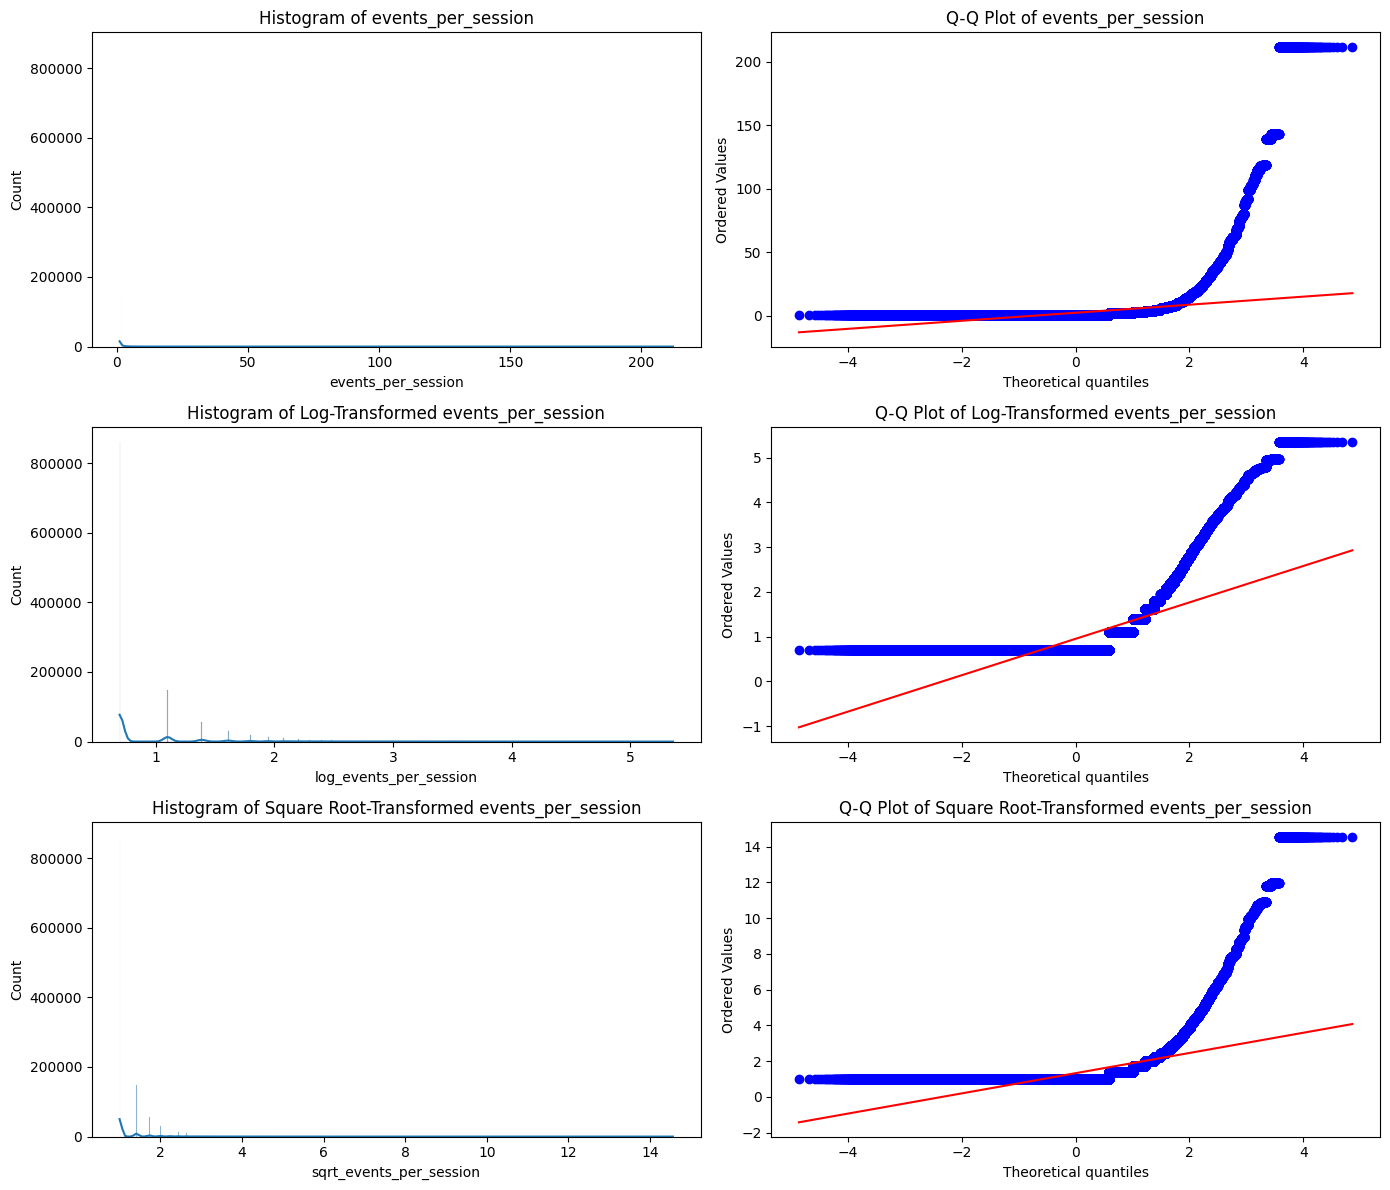

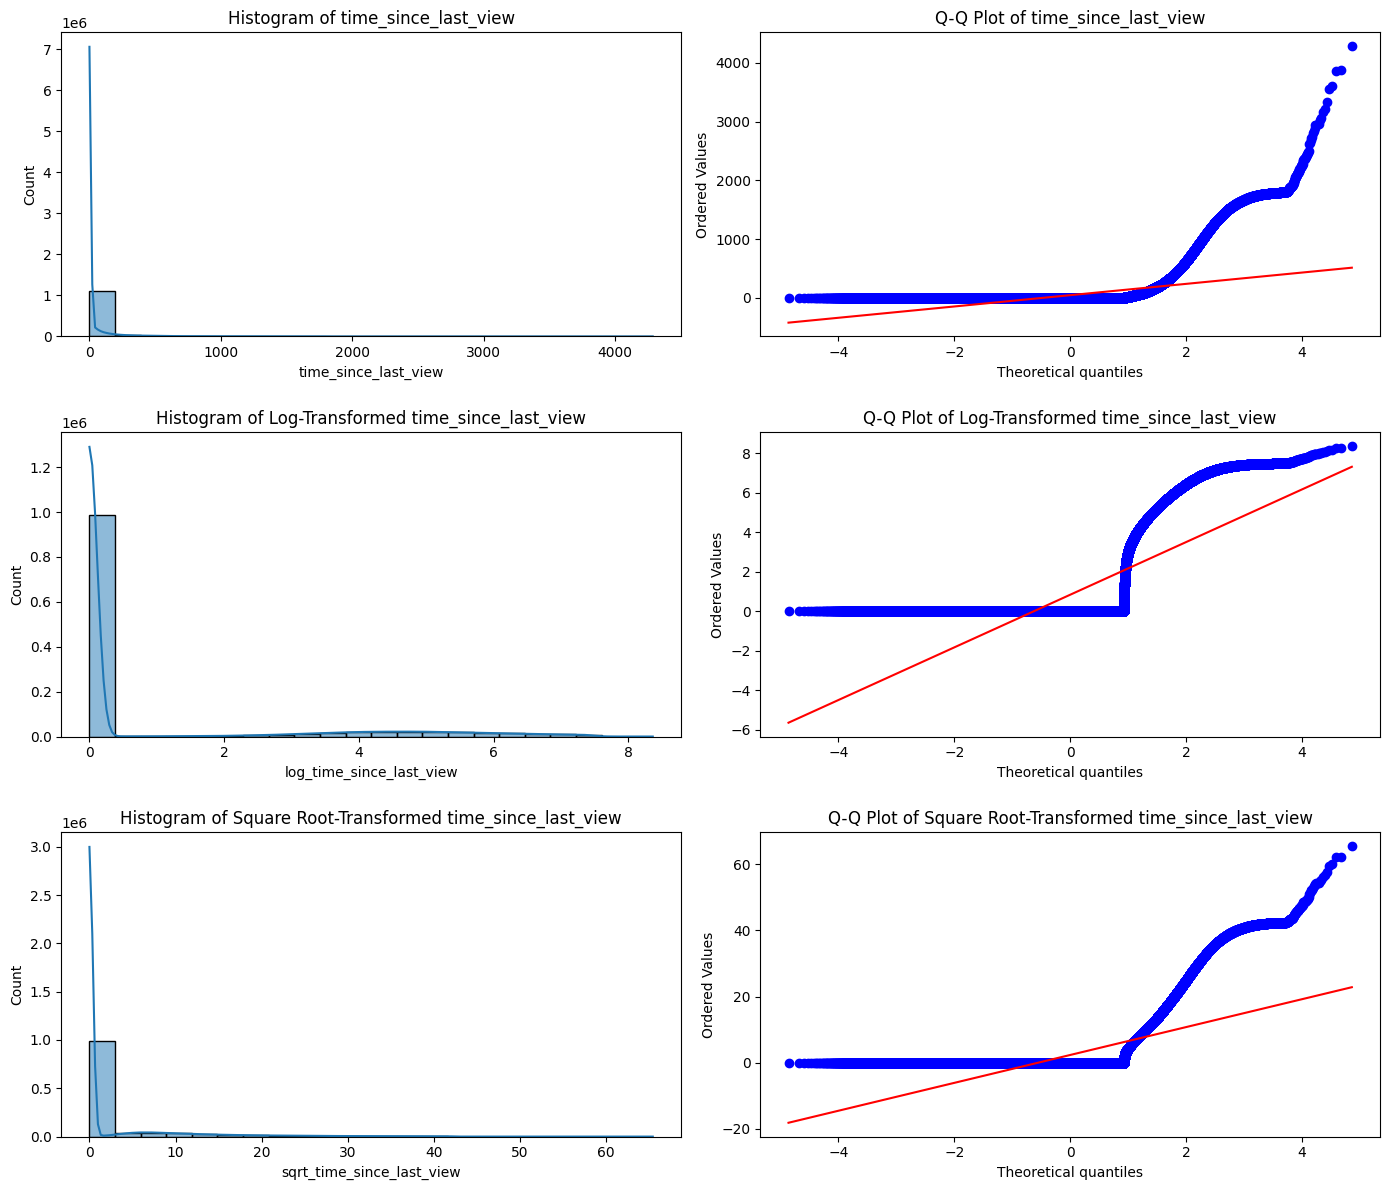

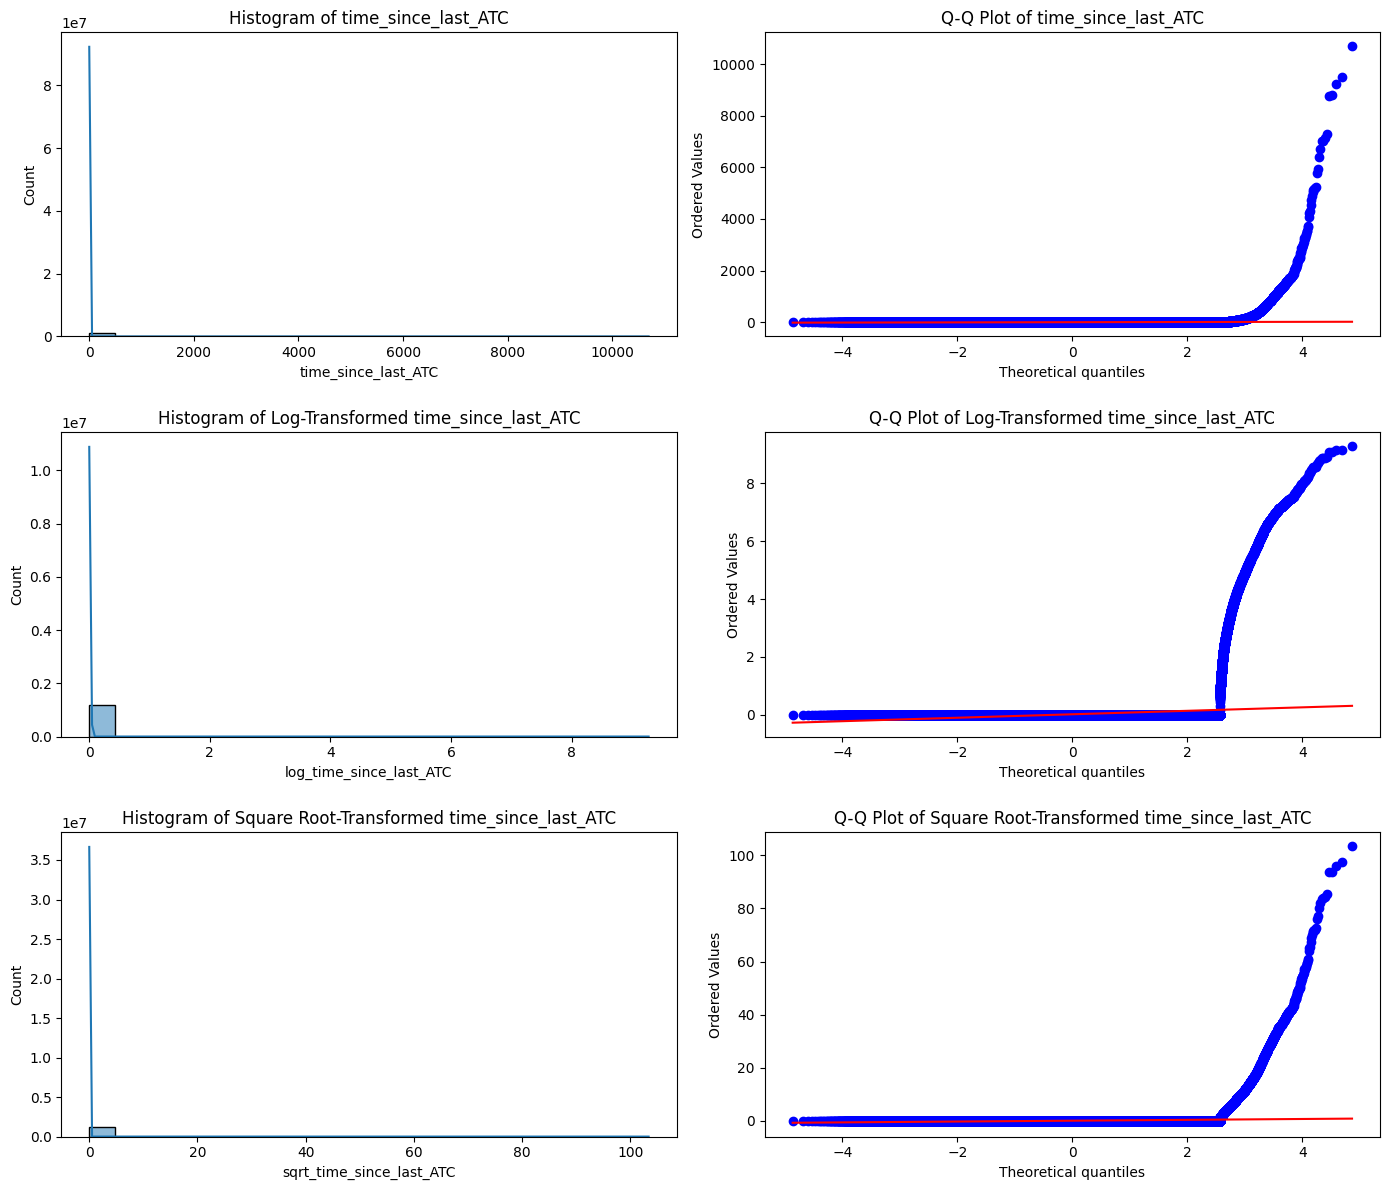

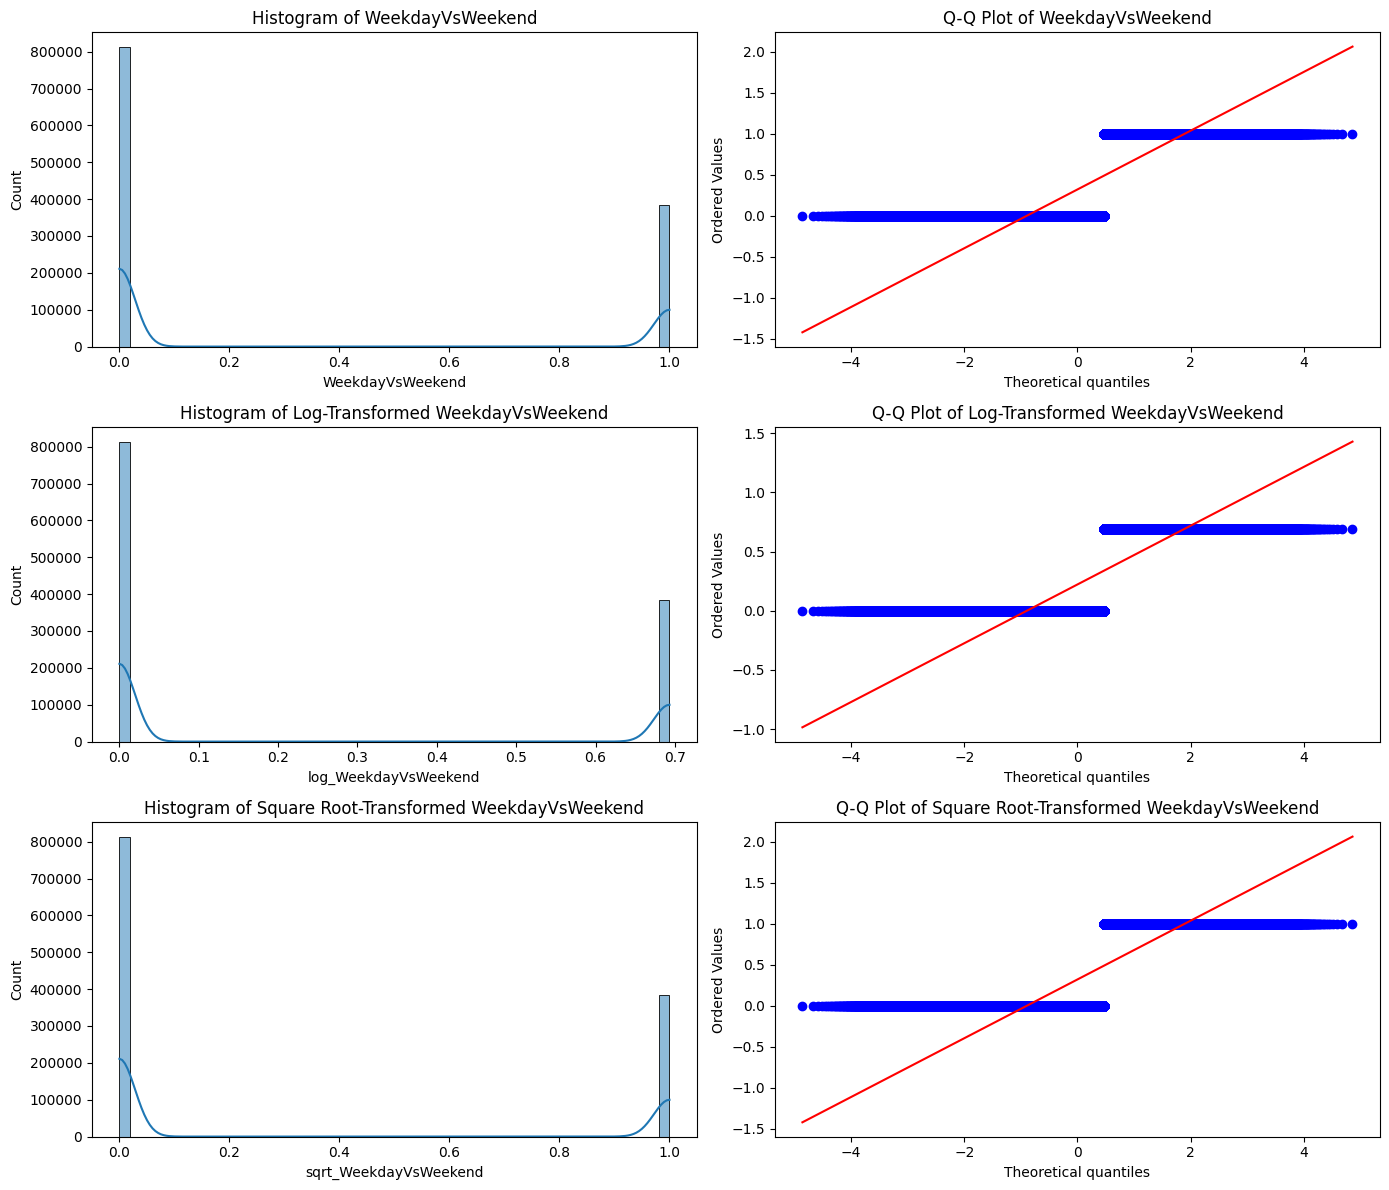

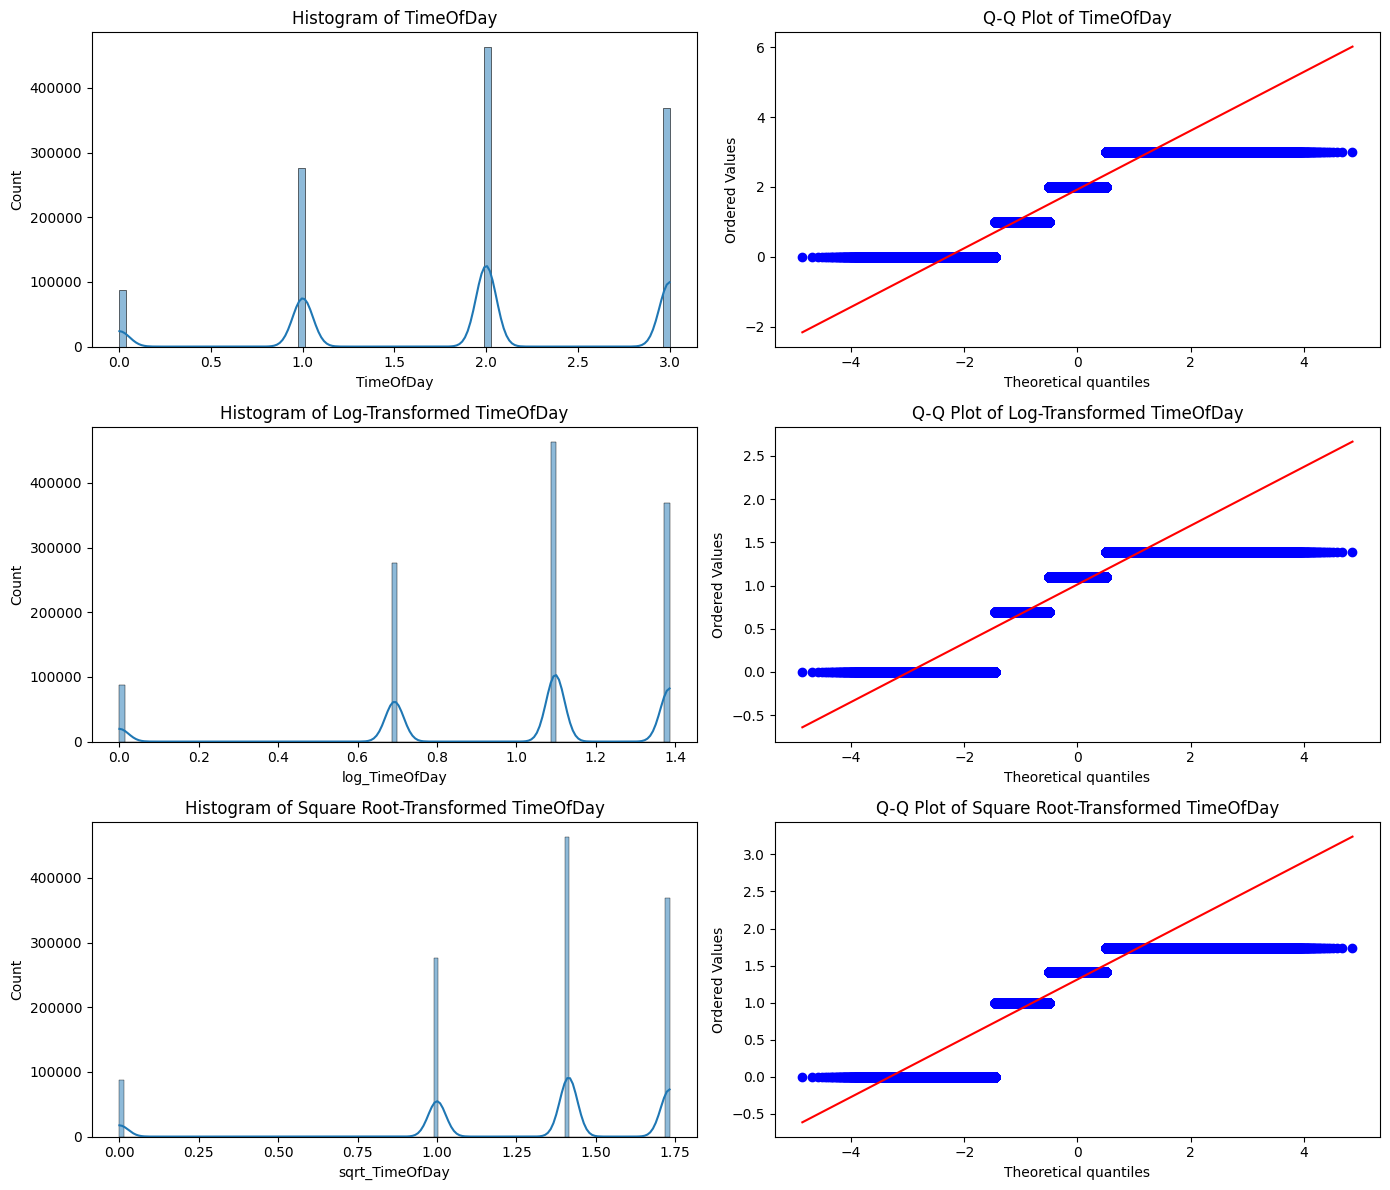

In [12]:
# Load your dataset (ensure 'pyarrow' or 'fastparquet' is installed)
data = pd.read_parquet("TMall (1).parquet")  # Replace with the correct file path if necessary

# Applying log and square root transformations to 'events_per_session', 'time_since_last_view', and 'time_since_last_ATC'
data['log_events_per_session'] = np.log(data['events_per_session'] + 1)
data['sqrt_events_per_session'] = np.sqrt(data['events_per_session'])
data['log_time_since_last_view'] = np.log(data['time_since_last_view'] + 1)
data['sqrt_time_since_last_view'] = np.sqrt(data['time_since_last_view'])
data['log_time_since_last_ATC'] = np.log(data['time_since_last_ATC'] + 1)
data['sqrt_time_since_last_ATC'] = np.sqrt(data['time_since_last_ATC'])
data['log_time_since_last_purchase'] = np.log(data['time_since_last_purchase'] + 1)
data['sqrt_time_since_last_purchase'] = np.sqrt(data['time_since_last_purchase'])
data['log_TimeOfDay'] = np.log(data['TimeOfDay'] + 1)
data['sqrt_TimeOfDay'] = np.sqrt(data['TimeOfDay'])
data['log_WeekdayVsWeekend'] = np.log(data['WeekdayVsWeekend'] + 1)
data['sqrt_WeekdayVsWeekend'] = np.sqrt(data['WeekdayVsWeekend'])
# Define a function to plot transformations for a given feature
def plot_transformations(data, original_feature, transformed_feature_log, transformed_feature_sqrt):
    plt.figure(figsize=(14, 12))

    # Original histogram
    plt.subplot(3, 2, 1)
    sns.histplot(data[original_feature], kde=True)
    plt.title(f"Histogram of {original_feature}")

    # Original Q-Q plot
    plt.subplot(3, 2, 2)
    probplot(data[original_feature].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of {original_feature}")

    # Log-transformed histogram
    plt.subplot(3, 2, 3)
    sns.histplot(data[transformed_feature_log], kde=True)
    plt.title(f"Histogram of Log-Transformed {original_feature}")

    # Log-transformed Q-Q plot
    plt.subplot(3, 2, 4)
    probplot(data[transformed_feature_log].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Log-Transformed {original_feature}")

    # Square root-transformed histogram
    plt.subplot(3, 2, 5)
    sns.histplot(data[transformed_feature_sqrt], kde=True)
    plt.title(f"Histogram of Square Root-Transformed {original_feature}")

    # Square root-transformed Q-Q plot
    plt.subplot(3, 2, 6)
    probplot(data[transformed_feature_sqrt].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot of Square Root-Transformed {original_feature}")

    plt.tight_layout()
    plt.show()

# Visualize transformations for 'events_per_session'
plot_transformations(data, 'events_per_session', 'log_events_per_session', 'sqrt_events_per_session')

# Visualize transformations for 'time_since_last_view'
plot_transformations(data, 'time_since_last_view', 'log_time_since_last_view', 'sqrt_time_since_last_view')

# Visualize transformations for 'time_since_last_ATC'
plot_transformations(data, 'time_since_last_ATC', 'log_time_since_last_ATC', 'sqrt_time_since_last_ATC')


plot_transformations(data, 'WeekdayVsWeekend', 'log_WeekdayVsWeekend', 'sqrt_WeekdayVsWeekend')
plot_transformations(data, 'TimeOfDay', 'log_TimeOfDay', 'sqrt_TimeOfDay')


In [13]:
# Ensure we have the required columns: TimeOfDay, WeekdayVsWeekend, DayOfWeek
# Convert timestamp to datetime format
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

# Extract relevant time-based features
df1['TimeOfDay'] = df1['timestamp'].dt.hour.apply(lambda x: 'Morning' if 5 <= x < 12 else
                                                         'Afternoon' if 12 <= x < 17 else
                                                         'Evening' if 17 <= x < 21 else 'Night')
df1['DayOfWeek'] = df1['timestamp'].dt.day_name()
df1['WeekdayVsWeekend'] = df1['timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Verify the new columns
print(df1[['timestamp', 'TimeOfDay', 'DayOfWeek', 'WeekdayVsWeekend']].head())

                      timestamp  TimeOfDay DayOfWeek WeekdayVsWeekend
1092725 2013-08-27 17:34:00.626    Evening   Tuesday          Weekday
1942407 2013-05-24 16:24:31.738  Afternoon    Friday          Weekday
1073483 2013-08-26 22:50:57.216      Night    Monday          Weekday
837287  2013-08-13 08:26:28.112    Morning   Tuesday          Weekday
324990  2013-06-17 02:08:42.130      Night    Monday          Weekday


with this code I created additional time-based features like TimeOfDay, DayOfWeek, and WeekdayVsWeekend. Features Created:
TimeOfDay:

Split into different periods: 'Morning', 'Afternoon', 'Evening', and 'Night'. This is useful for seeing if purchases are more common during specific times of the day.
DayOfWeek:

Represents the name of the day (e.g., Monday, Tuesday). This helps to identify if there is a specific day of the week with higher purchasing activity.
WeekdayVsWeekend:

Classifies each timestamp as either a 'Weekday' or 'Weekend'. This will help you compare purchasing trends between weekdays and weekends.

In [14]:
# Count purchases by TimeOfDay
purchases_by_time_of_day = df1.groupby('TimeOfDay')['Purchase'].sum().reindex(['Morning', 'Afternoon', 'Evening', 'Night'])

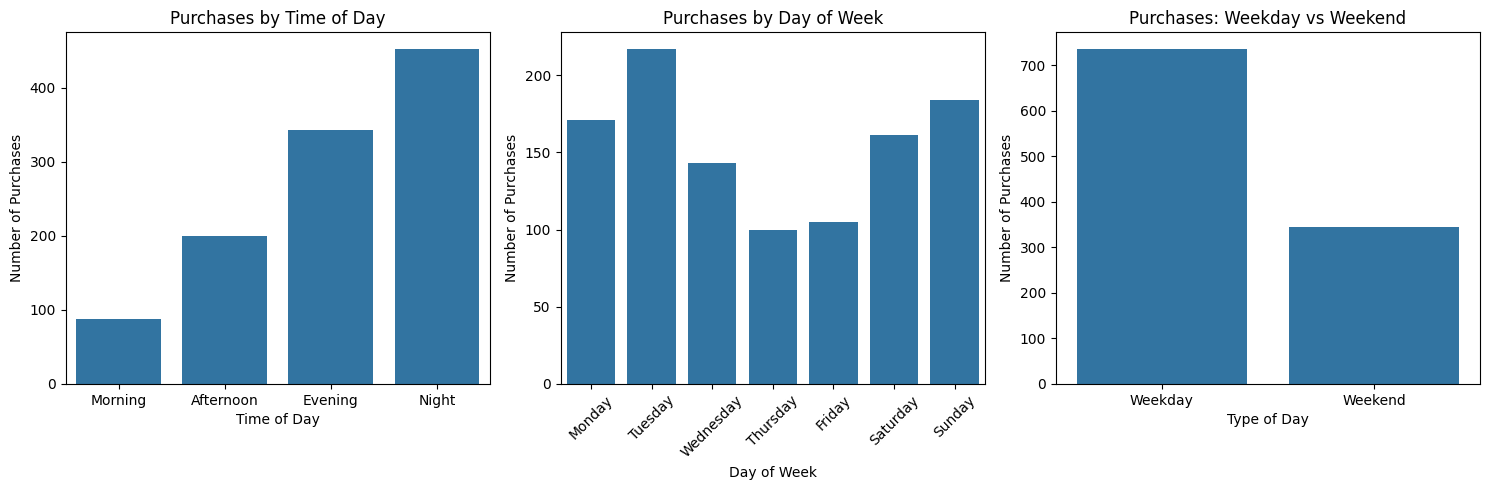

In [15]:
# Count purchases by DayOfWeek
purchases_by_day_of_week = df1.groupby('DayOfWeek')['Purchase'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Count purchases by WeekdayVsWeekend
purchases_by_weekday_weekend = df1.groupby('WeekdayVsWeekend')['Purchase'].sum()

# Step 2: Visualize the Purchasing Trends
plt.figure(figsize=(15, 5))

# # Plot 1: Purchases by Time of Day
plt.subplot(1, 3, 1)
sns.barplot(x=purchases_by_time_of_day.index, y=purchases_by_time_of_day.values)
plt.title('Purchases by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Purchases')

# Plot 2: Purchases by Day of Week
plt.subplot(1, 3, 2)
sns.barplot(x=purchases_by_day_of_week.index, y=purchases_by_day_of_week.values)
plt.title('Purchases by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)

# Plot 3: Purchases by Weekday vs Weekend
plt.subplot(1, 3, 3)
sns.barplot(x=purchases_by_weekday_weekend.index, y=purchases_by_weekday_weekend.values)
plt.title('Purchases: Weekday vs Weekend')
plt.xlabel('Type of Day')
plt.ylabel('Number of Purchases')

plt.tight_layout()
plt.show()

Plot 1: Purchases by Time of Day
Morning: Has the lowest number of purchases, suggesting lower engagement or interest during early hours.
Afternoon and Evening: Purchases increase in the afternoon and peak during the evening, indicating higher user engagement as the day progresses.
Night: Shows the highest number of purchases, possibly due to people browsing and shopping during late hours, which aligns with behavior patterns of users winding down and making decisions at the end of the day.
Insight: This plot suggests that purchasing behavior is higher in the evening and night. Therefore, evening and night hours could be considered "peak" times for purchases, making it a good window for targeted promotions.
Plot 2: Purchases by Day of Week
Tuesday: This day has the highest number of purchases, suggesting that users are particularly active on this day.
Mid-Week Decline: Wednesday, Thursday, and Friday see fewer purchases compared to Monday and Tuesday.
Weekend Increase: Saturday and Sunday show a moderate increase compared to the mid-week days but don't exceed the purchase count on Tuesday.
Insight: This plot indicates a spike in purchases at the start of the week, especially on Tuesday, with a lull mid-week and a slight recovery on weekends. This pattern could inform weekly promotions or discounts to sustain purchasing interest.
Plot 3: Purchases by Weekday vs. Weekend
Weekdays: There are significantly more purchases on weekdays than on weekends.
Weekends: Although weekends show fewer purchases, there is still notable activity.
Insight: This distinction between weekdays and weekends highlights that most users make purchases on weekdays. This could indicate a preference for browsing and shopping while at work or during weekday routines, possibly due to structured schedules or breaks.

In [16]:
# One-way ANOVA for TimeOfDay
model_time_of_day = ols('Purchase ~ C(TimeOfDay)', data=df1).fit()
anova_table_time_of_day = sm.stats.anova_lm(model_time_of_day, typ=2)
print("\nANOVA Table for Purchases by Time of Day")
print(anova_table_time_of_day)

# One-way ANOVA for DayOfWeek
model_day_of_week = ols('Purchase ~ C(DayOfWeek)', data=df1).fit()
anova_table_day_of_week = sm.stats.anova_lm(model_day_of_week, typ=2)
print("\nANOVA Table for Purchases by Day of Week")
print(anova_table_day_of_week)

# One-way ANOVA for Weekday vs Weekend
model_weekday_weekend = ols('Purchase ~ C(WeekdayVsWeekend)', data=df1).fit()
anova_table_weekday_weekend = sm.stats.anova_lm(model_weekday_weekend, typ=2)
print("\nANOVA Table for Purchases: Weekday vs Weekend")
print(anova_table_weekday_weekend)



ANOVA Table for Purchases by Time of Day
                   sum_sq         df         F    PR(>F)
C(TimeOfDay)     0.026163        3.0  9.658426  0.000002
Residual      1079.996850  1196083.0       NaN       NaN

ANOVA Table for Purchases by Day of Week
                   sum_sq         df         F    PR(>F)
C(DayOfWeek)     0.025015        6.0  4.617307  0.000107
Residual      1079.997998  1196080.0       NaN       NaN

ANOVA Table for Purchases: Weekday vs Weekend
                          sum_sq         df         F    PR(>F)
C(WeekdayVsWeekend)     0.000019        1.0  0.021267  0.884055
Residual             1080.022994  1196085.0       NaN       NaN


After performing the One way ANOVA, the analasys shows that time of the day has a significant impact on purchasing behavior due to a high F-statistic and a very low p-value. This suggests that users tend to make more purchases during specific times of the day.
Day of Week also shows a statistically significant impact on purchasing behavior, although the effect size is lower compared to TimeOfDay.
There may be some days where purchasing is more common, but the effect is not as strong.
Weekday vs Weekend does not have a significant effect on purchasing behavior due to the p-value (0.884055) which is much larger than 0.05, this suggests there is no statistically significant difference in purchasing behavior between weekdays and weekends.

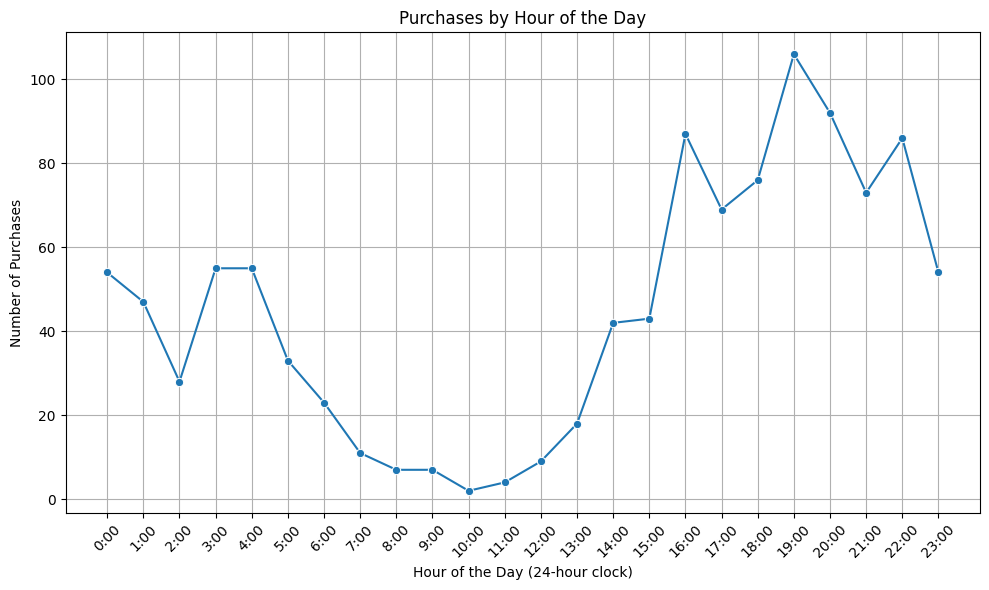

In [17]:
# Step 1: Extract hour of the day from timestamp
df1['hour'] = df1['timestamp'].dt.hour

# Step 2: Aggregate the purchase data by hour of the day
purchases_per_hour = df1.groupby('hour')['Purchase'].sum().reset_index()

# Step 3: Visualize the purchases by hour of the day
plt.figure(figsize=(10, 6))
sns.lineplot(x='hour', y='Purchase', data=purchases_per_hour, marker='o')

# Set plot labels and title
plt.title('Purchases by Hour of the Day')
plt.xlabel('Hour of the Day (24-hour clock)')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=range(0, 24), labels=[str(i) + ':00' for i in range(0, 24)], rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


this line chart displays the number of purchases made at different hours of the day, using a 24-hour clock format. The trends visible in the graph:

Peak Purchase Times:

There is a noticeable peak in purchases during the evening hours, particularly around 18:00 and 19:00 , where the number of purchases reaches its highest point, just over 100 purchases.
Another, smaller peak is observed around 16:00, suggesting that late afternoon and early evening hours are popular times for purchases.
Low Purchase Times:

Purchases are at their lowest in the early morning, between 4:00 AM and 12:00 PM. The number of purchases steadily declines from 4:00 AM and hits a low point around 9:00 AM, remaining low until noon.
There’s a slow, gradual increase in purchases after noon until the major peak in the late afternoon.
Overall Trend:

The trend suggests that most purchases are made in the afternoon and evening, while there is less activity in the morning and very late at night.
The pattern might reflect customer behavior, where people are more likely to make purchases after work hours or in the evening.

In [22]:

# Step 1: Prepare the Data
# Drop any rows with missing values in df1
df1_clean = df1.dropna()

# One-hot encode categorical features like TimeOfDay, DayOfWeek, and WeekdayVsWeekend
df1_encoded = pd.get_dummies(df1_clean, columns=['TimeOfDay', 'DayOfWeek', 'WeekdayVsWeekend'], drop_first=True)

# Define the feature set (X) and the target variable (y)
X = df1_encoded.drop(columns=['Purchase', 'timestamp'])  # Drop target variable and timestamp
y = df1_encoded['Purchase']  # Target variable

# Ensure there are no infinite values in X
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Logistic Regression Analysis using Statsmodels
try:
    # Adding a constant term to account for the intercept in the model
    X_train_sm = sm.add_constant(X_train)
    model = sm.Logit(y_train, X_train_sm).fit()
    print(model.summary())
except ValueError as e:
    print(f"ValueError encountered: {e}")

# Step 4: Logistic Regression using Scikit-Learn
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Step 5: Predicting on the Test Set
y_pred = logreg.predict(X_test)

# Step 6: Evaluate the Model
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


ValueError encountered: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    358508
           1       0.00      0.00      0.00       319

    accuracy                           1.00    358827
   macro avg       0.50      0.50      0.50    358827
weighted avg       1.00      1.00      1.00    358827


Accuracy: 1.00

Confusion Matrix:
[[358508      0]
 [   319      0]]


The model is not identifying any purchases. This result indicates that the model is completely biased toward predicting the majority class (non-purchase).
Class imbalance is a significant issue. The small number of purchase cases (319) compared to non-purchases (358,508) causes the model to ignore the minority class entirely.

In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)


In [23]:
# Step 1: ANOVA for Purchases by TimeOfDay
model_time_of_day = ols('Purchase ~ C(TimeOfDay)', data=df1).fit()
anova_table_time_of_day = sm.stats.anova_lm(model_time_of_day, typ=2)
print("\nANOVA Table for Purchases by Time of Day")
print(anova_table_time_of_day)

# Step 2: ANOVA for Purchases by DayOfWeek
model_day_of_week = ols('Purchase ~ C(DayOfWeek)', data=df1).fit()
anova_table_day_of_week = sm.stats.anova_lm(model_day_of_week, typ=2)
print("\nANOVA Table for Purchases by Day of Week")
print(anova_table_day_of_week)

# Step 3: ANOVA for Purchases by Weekday vs Weekend
model_weekday_weekend = ols('Purchase ~ C(WeekdayVsWeekend)', data=df1).fit()
anova_table_weekday_weekend = sm.stats.anova_lm(model_weekday_weekend, typ=2)
print("\nANOVA Table for Purchases: Weekday vs Weekend")
print(anova_table_weekday_weekend)



ANOVA Table for Purchases by Time of Day
                   sum_sq         df         F    PR(>F)
C(TimeOfDay)     0.026163        3.0  9.658426  0.000002
Residual      1079.996850  1196083.0       NaN       NaN

ANOVA Table for Purchases by Day of Week
                   sum_sq         df         F    PR(>F)
C(DayOfWeek)     0.025015        6.0  4.617307  0.000107
Residual      1079.997998  1196080.0       NaN       NaN

ANOVA Table for Purchases: Weekday vs Weekend
                          sum_sq         df         F    PR(>F)
C(WeekdayVsWeekend)     0.000019        1.0  0.021267  0.884055
Residual             1080.022994  1196085.0       NaN       NaN


In [24]:
# Define peak hours (e.g., 6 PM to 9 PM)
peak_hours = [18, 19, 20, 21]  # This corresponds to 6 PM to 9 PM

# Create the 'is_peak_time' feature based on the defined peak hours
data['peak_time'] = data['TimeOfDay'].apply(lambda x: 1 if x in peak_hours else 0)

# Check the result
print(data[['TimeOfDay', 'peak_time']].head())


         TimeOfDay  peak_time
1092725          1          0
1942407          1          0
1073483          2          0
837287           0          0
324990           3          0


In [25]:
peak_purchase_rate = data[data['peak_time'] == 1]['Purchase'].mean()
non_peak_purchase_rate = data[data['peak_time'] == 0]['Purchase'].mean()
print(f"Peak Purchase Rate: {peak_purchase_rate}")
print(f"Non-Peak Purchase Rate: {non_peak_purchase_rate}")


Peak Purchase Rate: nan
Non-Peak Purchase Rate: 0.0009037804106223042


In [26]:
print(data['peak_time'].value_counts())


peak_time
0    1196087
Name: count, dtype: int64


In [27]:
peak_purchases = data[data['peak_time'] == 1]['Purchase']
print(peak_purchases.head())  # Inspect a few rows
print(peak_purchases.notna().sum())  # Count non-missing values


Series([], Name: Purchase, dtype: int64)
0


In [33]:
peak_hours = [6, 7, 8, 9]  # Defining peak hours as 6 PM to 9 PM
print(data['TimeOfDay'])


1092725    1
1942407    1
1073483    2
837287     0
324990     3
          ..
592871     3
593065     3
606905     3
606923     3
1245528    1
Name: TimeOfDay, Length: 1196087, dtype: int64


In [34]:
# Define peak times based on the `TimeOfDay` categories observed
# Here, we're assuming evening (2) and night (3) are peak times
peak_times = [2, 3]

# Create the `peak_time` feature based on the new peak time categories
data['peak_time'] = data['TimeOfDay'].apply(lambda x: 1 if x in peak_times else 0)

# Calculate peak and non-peak purchase rates
peak_purchase_rate = data[data['peak_time'] == 1]['Purchase'].mean()
non_peak_purchase_rate = data[data['peak_time'] == 0]['Purchase'].mean()

print(f"Peak Purchase Rate: {peak_purchase_rate}")
print(f"Non-Peak Purchase Rate: {non_peak_purchase_rate}")


Peak Purchase Rate: 0.0009131299423609282
Non-Peak Purchase Rate: 0.0008824819118614339


The difference between the peak and non-peak purchase rates is very small (0.0913% vs. 0.0882%), which suggests that purchasing behavior does not differ significantly between peak and non-peak times in this dataset. The rates are almost identical, indicating that the time of day might not be a strong factor influencing purchase likelihood.

In [37]:
# Create a contingency table
peak_purchases = [data[data['peak_time'] == 1]['Purchase'].sum(),
                  data[data['peak_time'] == 1]['Purchase'].count()]
non_peak_purchases = [data[data['peak_time'] == 0]['Purchase'].sum(),
                      data[data['peak_time'] == 0]['Purchase'].count()]

table = [[peak_purchases[0], peak_purchases[1] - peak_purchases[0]],
         [non_peak_purchases[0], non_peak_purchases[1] - non_peak_purchases[0]]]

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(table)
print(f"Chi-square test statistic: {chi2}, p-value: {p}")


Chi-square test statistic: 0.23092390906959592, p-value: 0.6308396085077518


Since the p-value is much greater than 0.05, this result is not statistically significant. This means that I fail to reject the null hypothesis that there is no difference in purchase rates between peak and non-peak times.
Conclusion: The chi-square test suggests that the purchase rate is not significantly different between peak and non-peak times. In other words, the time of day (peak vs. non-peak) does not appear to have a significant effect on whether a purchase is made in your dataset.

In [40]:
features = ['peak_time', 'TimeOfDay', 'WeekdayVsWeekend', 'events_per_session', 'time_since_last_view', 'time_since_last_ATC']
X = data[features]
y = data['Purchase']  # Target variable

# Encode categorical variables (e.g., 'WeekdayVsWeekend')
X = pd.get_dummies(X, columns=['WeekdayVsWeekend'], drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training with Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (purchase)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print("Classification Report:\n", report)

Accuracy: 0.99909148419712
AUC-ROC: 0.7352601147780248
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    358508
           1       0.00      0.00      0.00       319

    accuracy                           1.00    358827
   macro avg       0.50      0.50      0.50    358827
weighted avg       1.00      1.00      1.00    358827



The otcome of this regression analysis shows a class imbalance problem: The model is biased toward the majority class, which leads to poor performance on the minority class (purchases). This is why precision, recall, and F1-score are zero for purchases.
Model's Limitations: Despite the high accuracy, the model isn’t effective at predicting purchases, making it unsuitable for directly answering the research question.

In [41]:
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')


In [42]:
# Model Training with class weight adjustment
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC-ROC: {roc_auc}")
print("Classification Report:\n", report)

Accuracy: 0.900344734370602
AUC-ROC: 0.8005343234952885
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    358508
           1       0.01      0.57      0.01       319

    accuracy                           0.90    358827
   macro avg       0.50      0.73      0.48    358827
weighted avg       1.00      0.90      0.95    358827



Accuracy (90%): The overall accuracy has decreased from before, which is expected when balancing for an imbalanced dataset, as the model now makes some trade-offs in the majority class.

AUC-ROC (0.80): The AUC-ROC score has increased, indicating the model is now better at distinguishing between purchases and non-purchases.

Classification Report:

Class 0 (Non-Purchases): The precision and recall remain high, though recall has slightly dropped to 90%.
Class 1 (Purchases):
Recall is now 0.57, meaning the model correctly identifies 57% of the purchase events, a substantial improvement from before.
Precision remains low at 0.01, indicating that many of the predictions for purchases are false positives. This is common when focusing on recall, as the model sacrifices precision to capture more actual purchases.

In [44]:
param_grid = {
    'class_weight': [{0: 1, 1: w} for w in [2, 5, 10, 15]],  # Adjust weight ratios
    'C': [0.1, 1, 10],  # Regularization parameter in logistic regression
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

This improved model may now be useful for identifying potential purchases with a greater focus on recall.

In [47]:

# Define your feature set and target variable
features = ['peak_time', 'TimeOfDay', 'WeekdayVsWeekend', 'events_per_session', 'time_since_last_view', 'time_since_last_ATC']
X = data[features]
y = data['Purchase']  # Target variable

# Encode categorical variables
X = pd.get_dummies(X, columns=['WeekdayVsWeekend'], drop_first=True)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the model with balanced class weight
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of the positive class (purchase)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

# Extract coefficients and calculate odds ratios
coefficients = pd.Series(model.coef_[0], index=X.columns)
odds_ratios = coefficients.apply(lambda x: np.exp(x))

print("\nFeature Coefficients:\n", coefficients)
print("\nOdds Ratios:\n", odds_ratios)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95    358508
           1       0.01      0.57      0.01       319

    accuracy                           0.90    358827
   macro avg       0.50      0.73      0.48    358827
weighted avg       1.00      0.90      0.95    358827

AUC-ROC: 0.8005343234952885

Feature Coefficients:
 peak_time                0.305122
TimeOfDay               -0.126944
events_per_session       0.645335
time_since_last_view   -35.175272
time_since_last_ATC    -16.674914
WeekdayVsWeekend_1      -0.070263
dtype: float64

Odds Ratios:
 peak_time               1.356790e+00
TimeOfDay               8.807829e-01
events_per_session      1.906626e+00
time_since_last_view    5.291436e-16
time_since_last_ATC     5.730293e-08
WeekdayVsWeekend_1      9.321488e-01
dtype: float64


In summary, this code:

Builds a predictive model that uses session characteristics to estimate the likelihood of a purchase.
Interprets the influence of each session characteristic through odds ratios, providing direct insights into which factors increase or decrease purchase probability.
Answers the research question by quantifying the effect of time-based and engagement-based features on purchasing behavior.
This analysis not only helps predict purchases but also provides actionable insights for understanding which session attributes are most impactful for user conversion.

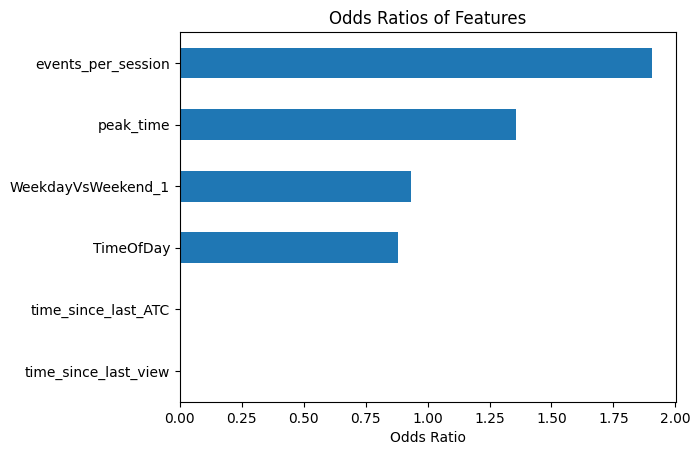

In [48]:
odds_ratios.sort_values().plot(kind='barh', title="Odds Ratios of Features")
plt.xlabel("Odds Ratio")
plt.show()


Engagement: events_per_session has the strongest positive impact, suggesting that high engagement significantly increases purchase likelihood.
Timing: peak_time and TimeOfDay indicate that sessions during peak hours and certain times of day have a higher chance of resulting in purchases.
Recency of Engagement: Features like time_since_last_ATC and time_since_last_view with odds ratios below 1 reinforce that more recent actions correlate with a higher likelihood of purchasing.
The model suggests that highly engaged sessions during peak times are most likely to result in purchases. Additionally, recent interactions (views or add-to-cart actions) are essential for conversions. These insights directly support the research question, showing how session attributes like engagement, timing, and recent activity influence purchasing behavior.